### An implementation of a simple neural network

#### Data Loading and Network Setup

In [141]:
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
from data_loader import MnistDataloader
from IPython.display import display, clear_output

print("Loading dataset...")
mnist_dataloader = MnistDataloader()
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()
x_train_images = np.array(x_train) # 60000 x 28 x 28
y_train = np.array(y_train) # 60000
x_test_images = np.array(x_test)   # 10000 x 28 x 28
y_test = np.array(y_test)   # 10000

# Convert tensor to lower dimension and normalize
print("Reshaping dataset...")
x_train = x_train_images.reshape(x_train_images.shape[0], -1) # 60000 x 784
x_train = x_train / 255.0
x_test = x_test_images.reshape(x_test_images.shape[0], -1)    # 10000 x 784
x_test = x_test / 255.0

# Apply one-hot-coding to labels
y_train_hot = np.zeros((y_train.size, 10))
y_train_hot[np.arange(y_train.size), y_train] = 1   # 60000 x 10
y_test_hot = np.zeros((y_test.size, 10))
y_test_hot[np.arange(y_test.size), y_test] = 1      # 10000 x 10

# Construct network
print("Creating network...")
layer_1 = 128
layer_2 = 10
weights_1 = np.random.randn(x_train.shape[1], layer_1) * 0.01  # 784 x 128
biases_1 = np.zeros(layer_1)                                   # 128
weights_2 = np.random.randn(layer_1, layer_2) * 0.01           # 128 x 10
biases_2 = np.zeros(layer_2)                                   # 10
print("Done")

Loading dataset...
Reshaping dataset...
Creating network...
Done


#### Network Training

'Training 59000 of 60000 done.'

[2.3057334116897814, 2.2989192958149895, 2.3110339574132004, 2.310397319746403, 2.3140074037718557, 2.2962895579785303, 2.297156965179995, 2.3109220762065066, 2.288415602425508, 2.297395958034182, 2.2906817102810595, 2.3126412125976454, 2.2715038136923833, 2.3168315659438417, 2.2809628142904548, 2.320416739893177, 2.2994999924867554, 2.329178528455608, 2.307664603888296, 2.3183545584962, 2.3058323624748684, 2.3034566434244415, 2.3118936239735404, 2.284407681808045, 2.274482966090125, 2.29549078331443, 2.293120891816109, 2.275711541511281, 2.275597578944598, 2.326545262167327, 2.270439095788558, 2.339753818229649, 2.3085696599323398, 2.311113995022011, 2.3198473847963657, 2.3271268821056035, 2.2948304329013234, 2.299638648652251, 2.3340077328883266, 2.2885919543215243, 2.2745945121313214, 2.340340819344926, 2.320439219644969, 2.3074138289047093, 2.2856891759323736, 2.3017216789892894, 2.3246776298489906, 2.325898795150129, 2.2931525214461064, 2.272869616376611, 2.2563288535717265, 2.301

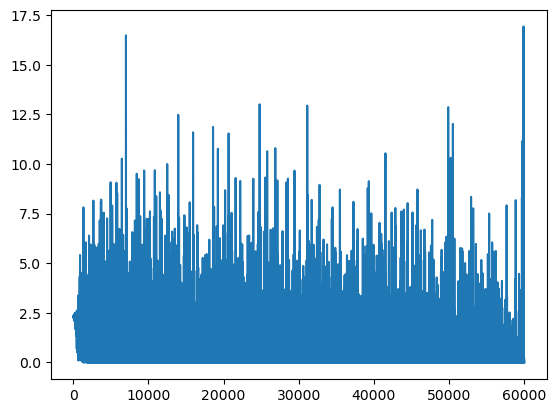

In [142]:
# ReLU activation function
def relu(vector):
    return np.maximum(0, vector)


# Derivative function of ReLU
def relu_derivative(x):
    return (x > 0).astype(float)


# Softmax activation function
def softmax(vector):
    exp_vector = np.exp(vector)
    return exp_vector / np.sum(exp_vector)


# Cross entropy loss function
def ce_loss(output_vector, label_vector):
    return -np.sum(label_vector * np.log(output_vector))

# Run network
learning_rate = 0.01
losses = []
for index in range(x_train.shape[0]):
    if index != 0 and index % 1000 == 0:
        clear_output(wait=True)
        display(f"Training {index} of {x_train.shape[0]} done.")

    # Forward pass
    output_1 = relu(np.dot(x_train[index], weights_1) + biases_1)
    output_2 = softmax(np.dot(output_1, weights_2) + biases_2)
    losses.append(ce_loss(output_2, y_train_hot[index]))

    # Backward pass
    d_output_2 = output_2 - y_train_hot[index]  # Combined derivative of softmax and ce loss
    d_loss_weights_2 = np.outer(output_1, d_output_2)
    d_output_1 = np.dot(weights_2, d_output_2) * relu_derivative(output_1)
    d_loss_weights_1 = np.outer(x_train[index], d_output_1)

    weights_2 -= learning_rate * d_loss_weights_2
    biases_2 -= learning_rate * d_output_2
    weights_1 -= learning_rate * d_loss_weights_1
    biases_1 -= learning_rate * d_output_1

print(losses)
plt.plot(losses)
print("Done")

In [145]:
import pickle
pickle.dump([
    weights_1,
    biases_1,
    weights_2,
    biases_2
], open("tmp.pickle", "wb"))

#### Test Network

[0.0003563749088890694, 0.07342493971156591, 0.0037578522364561167, 9.940415889821714e-06, 0.019446065531022523, 0.001597170657406431, 0.0012492280545944145, 0.005833113431861617, 0.4971857477999859, 0.0104942392198226, 2.986199864199853e-05, 0.06617613097562937, 0.0005943449304979794, 2.0482680232041344e-05, 0.0003251167531403307, 0.003171502858830125, 0.0012315733801957671, 0.000595874382590302, 0.04796233848227311, 0.0004995972841238109, 0.0011761574975800004, 0.09060148443775985, 0.006779246442224081, 0.00011407803681189293, 0.011619455178438749, 1.5395346893185568e-06, 0.028609928381009144, 0.00370953906302461, 7.113596658356394e-07, 0.0011131338251268174, 0.002958529842935746, 0.004549668613256499, 0.001923379601447096, 1.661869889258633, 0.011913201432087333, 0.00012076716803559503, 0.02441461136694065, 0.00047338759465511673, 1.8319257629094805, 0.0011017645260145532, 0.008355057947981937, 0.041923742651751514, 0.005275376611117449, 0.0064036289031247015, 0.012766823832379556, 

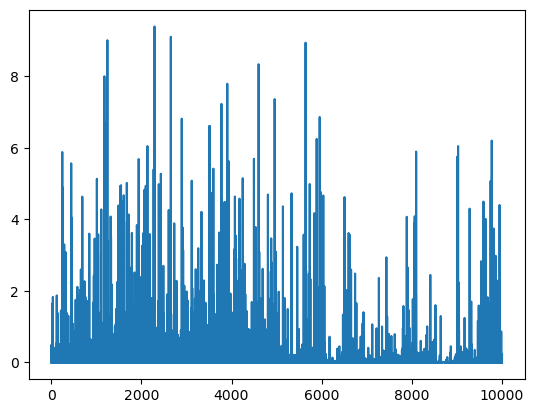

In [143]:
test_outputs = []
test_losses = []
for index in range(x_test.shape[0]):
    output_1 = relu(np.dot(x_test[index], weights_1) + biases_1)
    output_2 = softmax(np.dot(output_1, weights_2) + biases_2)
    loss = ce_loss(output_2, y_test_hot[index])
    test_outputs.append(output_2)
    test_losses.append(loss)

print(test_losses)
plt.plot(test_losses)

Index of max value: 2293
Accuracy: 95.55 %
Label:  9 - Prediction: 6 -> False


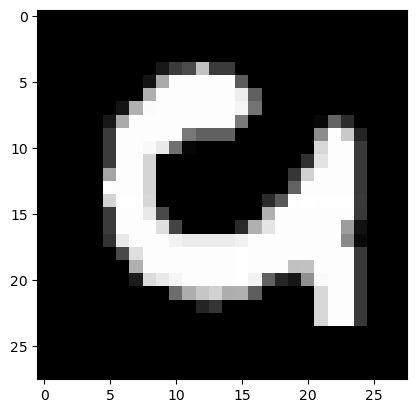

<BarContainer object of 10 artists>

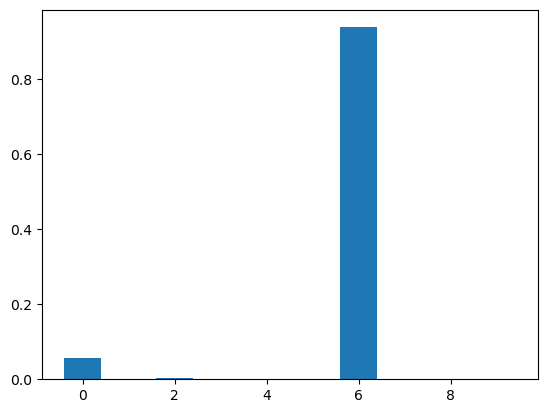

In [146]:
# Print max value index
max_index = test_losses.index(max(test_losses))
print("Index of max value:", max_index)

# Print accuracy
hits = [np.argmax(test_outputs[index]) == y_test[index] for index in range(len(x_test))]
print("Accuracy:", sum(hits) / len(hits) * 100, "%")

# Plotting the bar chart
index = 2293
print("Label: ", y_test[index], "- Prediction:", np.argmax(test_outputs[index]), "->", hits[index])
plt.imshow(x_test_images[index], cmap=plt.cm.gray)
plt.show()
plt.bar(range(len(test_outputs[index])), test_outputs[index])
